In [43]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
# text in Western (Windows 1252)

import pickle
import numpy as np
# import StringIO
import math
from keras import optimizers, metrics
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.constraints import maxnorm
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
# from keras import backend as Input
np.random.seed(7)

In [44]:
# %run ../../../prepare_data.py

import sys
sys.path.insert(0, '../../../')
from prepare_data import *

In [45]:
# X_train, X_other_features_train, y_train, X_validate, X_other_features_validate, y_validate = generate_full_matrix_inputs()
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', X_train, y_train, other_features = X_other_features_train)
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', X_validate, y_validate,  other_features = X_other_features_validate)
X_train, X_other_features_train, y_train = load_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', other_features=True)
X_validate, X_other_features_validate, y_validate = load_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', other_features=True)

In [24]:
# X_other_features = create_X_features(content)
# print (X_other_features[178200])
decode_position = 30
print (decode_input(X_train[decode_position], dictionary))
# print (X_other_features_train[0])
print (decode_X_features(feature_dictionary, [X_other_features_train[decode_position]]))
# print (len(X_other_features_train[0]))

navleèeta
Vmip3d--n
None


In [79]:
num_examples = len(X_train) # training set size
# nn_input_dim = max_word * len(dictionary) # input layer dimensionality
# nn_output_dim = max_num_vowels * max_num_vowels # output layer dimensionality
nn_output_dim = 11
nn_hdim = 516
batch_size = 16
actual_epoch = 60
num_fake_epoch = 20

# Gradient descent parameters (I picked these by hand)
# epsilon = 1 # learning rate for gradient descent
# reg_lambda = 1 # regularization strength

In [80]:
# word_processor = Sequential()
# word_processor.add(Conv1D(43, (3), input_shape=(23, 43), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(MaxPooling1D(pool_size=2))
# word_processor.add(Flatten())
# word_processor.add(Dense(516, activation='relu', kernel_constraint=maxnorm(3)))

# metadata_processor = Sequential()
# metadata_processor.add(Dense(256, input_dim=167, activation='relu'))

# model = Sequential()
# model.add(Merge([word_processor, metadata_processor], mode='concat'))  # Merge is your sensor fusion buddy
# model.add(Dense(1024, input_dim=(516 + 256), activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(nn_output_dim, activation='sigmoid'))


# -------------------------------------------------------

conv_input_shape=(23, 43)
othr_input = (167, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
x_conv = Conv1D(43, (3), padding='same', activation='relu')(conv_input)
x_conv = Conv1D(43, (3), padding='same', activation='relu')(x_conv)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)
# x_conv = Dense(516, activation='relu', kernel_constraint=maxnorm(3))(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')
# x_othr = Dense(256, input_dim=167, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(512, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(256, activation='relu')(othr_input)

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)

# model = Model(inputs=[conv_input, othr_input], output=x)

In [81]:
model = Model(inputs=[conv_input, othr_input], outputs=x)

# epochs = 5
# lrate = 0.1
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Compile model
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [82]:
history = model.fit_generator(generate_fake_epoch(X_train, X_other_features_train, y_train, batch_size), X_train.shape[0]/(batch_size * num_fake_epoch), epochs=actual_epoch*num_fake_epoch, validation_data=([X_validate, X_other_features_validate], y_validate))

# model.fit([X_train, X_other_features_train], y_train, validation_data=([X_validate, X_other_features_validate], y_validate), epochs=1, batch_size=16)

Epoch 1/1200
1336/1335 [==============================] - 30s - loss: 0.2784 - actual_accuracy: 0.1551 - val_loss: 0.2038 - val_actual_accuracy: 0.0353
Epoch 2/1200
1336/1335 [==============================] - 28s - loss: 0.2014 - actual_accuracy: 0.2071 - val_loss: 0.1693 - val_actual_accuracy: 0.4270
Epoch 3/1200
1336/1335 [==============================] - 30s - loss: 0.1710 - actual_accuracy: 0.3743 - val_loss: 0.1589 - val_actual_accuracy: 0.5221
Epoch 4/1200
1336/1335 [==============================] - 30s - loss: 0.1611 - actual_accuracy: 0.4353 - val_loss: 0.1500 - val_actual_accuracy: 0.5388
Epoch 5/1200
1336/1335 [==============================] - 31s - loss: 0.1496 - actual_accuracy: 0.4862 - val_loss: 0.1401 - val_actual_accuracy: 0.5551
Epoch 6/1200
1336/1335 [==============================] - 31s - loss: 0.1407 - actual_accuracy: 0.5182 - val_loss: 0.1296 - val_actual_accuracy: 0.5984
Epoch 7/1200
1336/1335 [==============================] - 31s - loss: 0.1336 - actual_ac

1336/1335 [==============================] - 30s - loss: 0.0518 - actual_accuracy: 0.8729 - val_loss: 0.0818 - val_actual_accuracy: 0.8170
Epoch 55/1200
1336/1335 [==============================] - 30s - loss: 0.0506 - actual_accuracy: 0.8790 - val_loss: 0.0853 - val_actual_accuracy: 0.8117
Epoch 56/1200
1336/1335 [==============================] - 27s - loss: 0.0523 - actual_accuracy: 0.8752 - val_loss: 0.0829 - val_actual_accuracy: 0.8155
Epoch 57/1200
1336/1335 [==============================] - 32s - loss: 0.0504 - actual_accuracy: 0.8787 - val_loss: 0.0808 - val_actual_accuracy: 0.8194
Epoch 58/1200
1336/1335 [==============================] - 29s - loss: 0.0491 - actual_accuracy: 0.8811 - val_loss: 0.0814 - val_actual_accuracy: 0.8202
Epoch 59/1200
1336/1335 [==============================] - 29s - loss: 0.0492 - actual_accuracy: 0.8809 - val_loss: 0.0870 - val_actual_accuracy: 0.8182
Epoch 60/1200
1336/1335 [==============================] - 33s - loss: 0.0496 - actual_accuracy:

1336/1335 [==============================] - 33s - loss: 0.0337 - actual_accuracy: 0.9187 - val_loss: 0.0947 - val_actual_accuracy: 0.8340
Epoch 108/1200
1336/1335 [==============================] - 28s - loss: 0.0330 - actual_accuracy: 0.9208 - val_loss: 0.0939 - val_actual_accuracy: 0.8319
Epoch 109/1200
1336/1335 [==============================] - 29s - loss: 0.0321 - actual_accuracy: 0.9246 - val_loss: 0.0955 - val_actual_accuracy: 0.8352
Epoch 110/1200
1336/1335 [==============================] - 29s - loss: 0.0324 - actual_accuracy: 0.9240 - val_loss: 0.0968 - val_actual_accuracy: 0.8313
Epoch 111/1200
1336/1335 [==============================] - 28s - loss: 0.0333 - actual_accuracy: 0.9231 - val_loss: 0.0949 - val_actual_accuracy: 0.8338
Epoch 112/1200
1336/1335 [==============================] - 30s - loss: 0.0326 - actual_accuracy: 0.9236 - val_loss: 0.0895 - val_actual_accuracy: 0.8313
Epoch 113/1200
1336/1335 [==============================] - 29s - loss: 0.0330 - actual_acc

1336/1335 [==============================] - 29s - loss: 0.0262 - actual_accuracy: 0.9386 - val_loss: 0.1013 - val_actual_accuracy: 0.8430
Epoch 161/1200
1336/1335 [==============================] - 28s - loss: 0.0263 - actual_accuracy: 0.9411 - val_loss: 0.1049 - val_actual_accuracy: 0.8358
Epoch 162/1200
1336/1335 [==============================] - 30s - loss: 0.0260 - actual_accuracy: 0.9376 - val_loss: 0.0971 - val_actual_accuracy: 0.8443
Epoch 163/1200
1336/1335 [==============================] - 29s - loss: 0.0262 - actual_accuracy: 0.9370 - val_loss: 0.0975 - val_actual_accuracy: 0.8409
Epoch 164/1200
1336/1335 [==============================] - 34s - loss: 0.0246 - actual_accuracy: 0.9413 - val_loss: 0.0970 - val_actual_accuracy: 0.8432
Epoch 165/1200
1336/1335 [==============================] - 29s - loss: 0.0259 - actual_accuracy: 0.9399 - val_loss: 0.1055 - val_actual_accuracy: 0.8344
Epoch 166/1200
1336/1335 [==============================] - 32s - loss: 0.0258 - actual_acc

1336/1335 [==============================] - 33s - loss: 0.0223 - actual_accuracy: 0.9472 - val_loss: 0.1115 - val_actual_accuracy: 0.8452
Epoch 214/1200
1336/1335 [==============================] - 31s - loss: 0.0218 - actual_accuracy: 0.9478 - val_loss: 0.1134 - val_actual_accuracy: 0.8397
Epoch 215/1200
1336/1335 [==============================] - 34s - loss: 0.0219 - actual_accuracy: 0.9476 - val_loss: 0.1107 - val_actual_accuracy: 0.8410
Epoch 216/1200
1336/1335 [==============================] - 31s - loss: 0.0229 - actual_accuracy: 0.9453 - val_loss: 0.1120 - val_actual_accuracy: 0.8443
Epoch 217/1200
1336/1335 [==============================] - 30s - loss: 0.0219 - actual_accuracy: 0.9482 - val_loss: 0.1036 - val_actual_accuracy: 0.8421
Epoch 218/1200
1336/1335 [==============================] - 31s - loss: 0.0209 - actual_accuracy: 0.9494 - val_loss: 0.1073 - val_actual_accuracy: 0.8504
Epoch 219/1200
1336/1335 [==============================] - 31s - loss: 0.0224 - actual_acc

1336/1335 [==============================] - 31s - loss: 0.0193 - actual_accuracy: 0.9539 - val_loss: 0.1171 - val_actual_accuracy: 0.8446
Epoch 267/1200
1336/1335 [==============================] - 35s - loss: 0.0209 - actual_accuracy: 0.9511 - val_loss: 0.1145 - val_actual_accuracy: 0.8451
Epoch 268/1200
1336/1335 [==============================] - 31s - loss: 0.0196 - actual_accuracy: 0.9533 - val_loss: 0.1086 - val_actual_accuracy: 0.8497
Epoch 269/1200
1336/1335 [==============================] - 29s - loss: 0.0191 - actual_accuracy: 0.9552 - val_loss: 0.1145 - val_actual_accuracy: 0.8433
Epoch 270/1200
1336/1335 [==============================] - 32s - loss: 0.0196 - actual_accuracy: 0.9526 - val_loss: 0.1147 - val_actual_accuracy: 0.8492
Epoch 271/1200
1336/1335 [==============================] - 32s - loss: 0.0196 - actual_accuracy: 0.9544 - val_loss: 0.1050 - val_actual_accuracy: 0.8509
Epoch 272/1200
1336/1335 [==============================] - 29s - loss: 0.0195 - actual_acc

1336/1335 [==============================] - 28s - loss: 0.0190 - actual_accuracy: 0.9560 - val_loss: 0.1080 - val_actual_accuracy: 0.8530
Epoch 320/1200
1336/1335 [==============================] - 30s - loss: 0.0179 - actual_accuracy: 0.9568 - val_loss: 0.1115 - val_actual_accuracy: 0.8537
Epoch 321/1200
1336/1335 [==============================] - 29s - loss: 0.0180 - actual_accuracy: 0.9591 - val_loss: 0.1131 - val_actual_accuracy: 0.8460
Epoch 322/1200
1336/1335 [==============================] - 30s - loss: 0.0182 - actual_accuracy: 0.9573 - val_loss: 0.1134 - val_actual_accuracy: 0.8523
Epoch 323/1200
1336/1335 [==============================] - 31s - loss: 0.0174 - actual_accuracy: 0.9597 - val_loss: 0.1148 - val_actual_accuracy: 0.8526
Epoch 324/1200
1336/1335 [==============================] - 28s - loss: 0.0174 - actual_accuracy: 0.9586 - val_loss: 0.1155 - val_actual_accuracy: 0.8528
Epoch 325/1200
1336/1335 [==============================] - 29s - loss: 0.0184 - actual_acc

1336/1335 [==============================] - 29s - loss: 0.0161 - actual_accuracy: 0.9618 - val_loss: 0.1230 - val_actual_accuracy: 0.8522
Epoch 373/1200
1336/1335 [==============================] - 30s - loss: 0.0159 - actual_accuracy: 0.9621 - val_loss: 0.1161 - val_actual_accuracy: 0.8552
Epoch 374/1200
1336/1335 [==============================] - 29s - loss: 0.0161 - actual_accuracy: 0.9619 - val_loss: 0.1192 - val_actual_accuracy: 0.8520
Epoch 375/1200
1336/1335 [==============================] - 29s - loss: 0.0156 - actual_accuracy: 0.9637 - val_loss: 0.1193 - val_actual_accuracy: 0.8532
Epoch 376/1200
1336/1335 [==============================] - 28s - loss: 0.0172 - actual_accuracy: 0.9592 - val_loss: 0.1154 - val_actual_accuracy: 0.8539
Epoch 377/1200
1336/1335 [==============================] - 29s - loss: 0.0168 - actual_accuracy: 0.9617 - val_loss: 0.1236 - val_actual_accuracy: 0.8490
Epoch 378/1200
1336/1335 [==============================] - 33s - loss: 0.0155 - actual_acc

1336/1335 [==============================] - 30s - loss: 0.0152 - actual_accuracy: 0.9649 - val_loss: 0.1166 - val_actual_accuracy: 0.8542
Epoch 426/1200
1336/1335 [==============================] - 30s - loss: 0.0152 - actual_accuracy: 0.9659 - val_loss: 0.1157 - val_actual_accuracy: 0.8543
Epoch 427/1200
1336/1335 [==============================] - 29s - loss: 0.0162 - actual_accuracy: 0.9628 - val_loss: 0.1169 - val_actual_accuracy: 0.8518
Epoch 428/1200
1336/1335 [==============================] - 30s - loss: 0.0153 - actual_accuracy: 0.9642 - val_loss: 0.1283 - val_actual_accuracy: 0.8459
Epoch 429/1200
1336/1335 [==============================] - 29s - loss: 0.0145 - actual_accuracy: 0.9653 - val_loss: 0.1242 - val_actual_accuracy: 0.8578
Epoch 430/1200
1336/1335 [==============================] - 30s - loss: 0.0142 - actual_accuracy: 0.9654 - val_loss: 0.1272 - val_actual_accuracy: 0.8576
Epoch 431/1200
1336/1335 [==============================] - 30s - loss: 0.0150 - actual_acc

1336/1335 [==============================] - 31s - loss: 0.0136 - actual_accuracy: 0.9684 - val_loss: 0.1196 - val_actual_accuracy: 0.8596
Epoch 479/1200
1336/1335 [==============================] - 32s - loss: 0.0144 - actual_accuracy: 0.9659 - val_loss: 0.1199 - val_actual_accuracy: 0.8592
Epoch 480/1200
1336/1335 [==============================] - 31s - loss: 0.0143 - actual_accuracy: 0.9659 - val_loss: 0.1242 - val_actual_accuracy: 0.8584
Epoch 481/1200
1336/1335 [==============================] - 27s - loss: 0.0148 - actual_accuracy: 0.9635 - val_loss: 0.1239 - val_actual_accuracy: 0.8608
Epoch 482/1200
1336/1335 [==============================] - 30s - loss: 0.0141 - actual_accuracy: 0.9678 - val_loss: 0.1248 - val_actual_accuracy: 0.8554
Epoch 483/1200
1336/1335 [==============================] - 30s - loss: 0.0140 - actual_accuracy: 0.9680 - val_loss: 0.1253 - val_actual_accuracy: 0.8599
Epoch 484/1200
1336/1335 [==============================] - 31s - loss: 0.0141 - actual_acc

1336/1335 [==============================] - 33s - loss: 0.0137 - actual_accuracy: 0.9692 - val_loss: 0.1275 - val_actual_accuracy: 0.8603
Epoch 532/1200
1336/1335 [==============================] - 28s - loss: 0.0139 - actual_accuracy: 0.9687 - val_loss: 0.1346 - val_actual_accuracy: 0.8579
Epoch 533/1200
1336/1335 [==============================] - 37s - loss: 0.0138 - actual_accuracy: 0.9693 - val_loss: 0.1299 - val_actual_accuracy: 0.8565
Epoch 534/1200
1336/1335 [==============================] - 30s - loss: 0.0139 - actual_accuracy: 0.9663 - val_loss: 0.1277 - val_actual_accuracy: 0.8574
Epoch 535/1200
1336/1335 [==============================] - 34s - loss: 0.0127 - actual_accuracy: 0.9714 - val_loss: 0.1296 - val_actual_accuracy: 0.8587
Epoch 536/1200
1336/1335 [==============================] - 32s - loss: 0.0140 - actual_accuracy: 0.9676 - val_loss: 0.1294 - val_actual_accuracy: 0.8580
Epoch 537/1200
1336/1335 [==============================] - 29s - loss: 0.0133 - actual_acc

1336/1335 [==============================] - 30s - loss: 0.0127 - actual_accuracy: 0.9715 - val_loss: 0.1309 - val_actual_accuracy: 0.8536
Epoch 585/1200
1336/1335 [==============================] - 29s - loss: 0.0129 - actual_accuracy: 0.9709 - val_loss: 0.1213 - val_actual_accuracy: 0.8614
Epoch 586/1200
1336/1335 [==============================] - 28s - loss: 0.0121 - actual_accuracy: 0.9730 - val_loss: 0.1274 - val_actual_accuracy: 0.8560
Epoch 587/1200
1336/1335 [==============================] - 30s - loss: 0.0138 - actual_accuracy: 0.9689 - val_loss: 0.1256 - val_actual_accuracy: 0.8530
Epoch 588/1200
1336/1335 [==============================] - 32s - loss: 0.0131 - actual_accuracy: 0.9698 - val_loss: 0.1294 - val_actual_accuracy: 0.8564
Epoch 589/1200
1336/1335 [==============================] - 27s - loss: 0.0124 - actual_accuracy: 0.9721 - val_loss: 0.1288 - val_actual_accuracy: 0.8589
Epoch 590/1200
1336/1335 [==============================] - 28s - loss: 0.0126 - actual_acc

1336/1335 [==============================] - 33s - loss: 0.0119 - actual_accuracy: 0.9726 - val_loss: 0.1390 - val_actual_accuracy: 0.8581
Epoch 638/1200
1336/1335 [==============================] - 30s - loss: 0.0116 - actual_accuracy: 0.9730 - val_loss: 0.1225 - val_actual_accuracy: 0.8600
Epoch 639/1200
1336/1335 [==============================] - 28s - loss: 0.0127 - actual_accuracy: 0.9720 - val_loss: 0.1298 - val_actual_accuracy: 0.8601
Epoch 640/1200
1336/1335 [==============================] - 28s - loss: 0.0125 - actual_accuracy: 0.9706 - val_loss: 0.1371 - val_actual_accuracy: 0.8595
Epoch 641/1200
1336/1335 [==============================] - 30s - loss: 0.0127 - actual_accuracy: 0.9717 - val_loss: 0.1393 - val_actual_accuracy: 0.8544
Epoch 642/1200
1336/1335 [==============================] - 30s - loss: 0.0129 - actual_accuracy: 0.9696 - val_loss: 0.1240 - val_actual_accuracy: 0.8622
Epoch 643/1200
1336/1335 [==============================] - 28s - loss: 0.0130 - actual_acc

1336/1335 [==============================] - 33s - loss: 0.0118 - actual_accuracy: 0.9727 - val_loss: 0.1323 - val_actual_accuracy: 0.8595
Epoch 691/1200
1336/1335 [==============================] - 30s - loss: 0.0117 - actual_accuracy: 0.9724 - val_loss: 0.1324 - val_actual_accuracy: 0.8593
Epoch 692/1200
1336/1335 [==============================] - 31s - loss: 0.0121 - actual_accuracy: 0.9731 - val_loss: 0.1300 - val_actual_accuracy: 0.8598
Epoch 693/1200
1336/1335 [==============================] - 30s - loss: 0.0123 - actual_accuracy: 0.9726 - val_loss: 0.1333 - val_actual_accuracy: 0.8562
Epoch 694/1200
1336/1335 [==============================] - 32s - loss: 0.0118 - actual_accuracy: 0.9738 - val_loss: 0.1199 - val_actual_accuracy: 0.8624.9
Epoch 695/1200
1336/1335 [==============================] - 32s - loss: 0.0116 - actual_accuracy: 0.9730 - val_loss: 0.1238 - val_actual_accuracy: 0.8577
Epoch 696/1200
1336/1335 [==============================] - 34s - loss: 0.0126 - actual_a

1336/1335 [==============================] - 30s - loss: 0.0112 - actual_accuracy: 0.9745 - val_loss: 0.1294 - val_actual_accuracy: 0.8623
Epoch 744/1200
1336/1335 [==============================] - 31s - loss: 0.0109 - actual_accuracy: 0.9745 - val_loss: 0.1347 - val_actual_accuracy: 0.8602
Epoch 745/1200
1336/1335 [==============================] - 32s - loss: 0.0118 - actual_accuracy: 0.9744 - val_loss: 0.1236 - val_actual_accuracy: 0.8597
Epoch 746/1200
1336/1335 [==============================] - 31s - loss: 0.0119 - actual_accuracy: 0.9730 - val_loss: 0.1337 - val_actual_accuracy: 0.8598
Epoch 747/1200
1336/1335 [==============================] - 30s - loss: 0.0117 - actual_accuracy: 0.9730 - val_loss: 0.1337 - val_actual_accuracy: 0.8567
Epoch 748/1200
1336/1335 [==============================] - 27s - loss: 0.0120 - actual_accuracy: 0.9729 - val_loss: 0.1379 - val_actual_accuracy: 0.8553
Epoch 749/1200
1336/1335 [==============================] - 28s - loss: 0.0116 - actual_acc

1336/1335 [==============================] - 30s - loss: 0.0128 - actual_accuracy: 0.9700 - val_loss: 0.1433 - val_actual_accuracy: 0.8581
Epoch 797/1200
1336/1335 [==============================] - 33s - loss: 0.0117 - actual_accuracy: 0.9733 - val_loss: 0.1235 - val_actual_accuracy: 0.8607
Epoch 798/1200
1336/1335 [==============================] - 30s - loss: 0.0114 - actual_accuracy: 0.9729 - val_loss: 0.1384 - val_actual_accuracy: 0.8600
Epoch 799/1200
1336/1335 [==============================] - 34s - loss: 0.0115 - actual_accuracy: 0.9745 - val_loss: 0.1371 - val_actual_accuracy: 0.8628
Epoch 800/1200
1336/1335 [==============================] - 31s - loss: 0.0111 - actual_accuracy: 0.9743 - val_loss: 0.1404 - val_actual_accuracy: 0.8555
Epoch 801/1200
1336/1335 [==============================] - 32s - loss: 0.0116 - actual_accuracy: 0.9732 - val_loss: 0.1367 - val_actual_accuracy: 0.8555
Epoch 802/1200
1336/1335 [==============================] - 31s - loss: 0.0110 - actual_acc

1336/1335 [==============================] - 33s - loss: 0.0109 - actual_accuracy: 0.9736 - val_loss: 0.1443 - val_actual_accuracy: 0.8609
Epoch 850/1200
1336/1335 [==============================] - 38s - loss: 0.0107 - actual_accuracy: 0.9750 - val_loss: 0.1401 - val_actual_accuracy: 0.8613
Epoch 851/1200
1336/1335 [==============================] - 40s - loss: 0.0111 - actual_accuracy: 0.9754 - val_loss: 0.1218 - val_actual_accuracy: 0.8630
Epoch 852/1200
1336/1335 [==============================] - 41s - loss: 0.0115 - actual_accuracy: 0.9738 - val_loss: 0.1352 - val_actual_accuracy: 0.8642
Epoch 853/1200
1336/1335 [==============================] - 41s - loss: 0.0115 - actual_accuracy: 0.9752 - val_loss: 0.1306 - val_actual_accuracy: 0.8605
Epoch 854/1200
1336/1335 [==============================] - 38s - loss: 0.0109 - actual_accuracy: 0.9753 - val_loss: 0.1370 - val_actual_accuracy: 0.8620
Epoch 855/1200
1336/1335 [==============================] - 41s - loss: 0.0109 - actual_acc

1336/1335 [==============================] - 37s - loss: 0.0109 - actual_accuracy: 0.9752 - val_loss: 0.1420 - val_actual_accuracy: 0.8578
Epoch 903/1200
1336/1335 [==============================] - 34s - loss: 0.0111 - actual_accuracy: 0.9739 - val_loss: 0.1301 - val_actual_accuracy: 0.8595
Epoch 904/1200
1336/1335 [==============================] - 36s - loss: 0.0105 - actual_accuracy: 0.9765 - val_loss: 0.1366 - val_actual_accuracy: 0.8631
Epoch 905/1200
1336/1335 [==============================] - 35s - loss: 0.0099 - actual_accuracy: 0.9784 - val_loss: 0.1487 - val_actual_accuracy: 0.8564
Epoch 906/1200
1336/1335 [==============================] - 37s - loss: 0.0109 - actual_accuracy: 0.9741 - val_loss: 0.1444 - val_actual_accuracy: 0.8575
Epoch 907/1200
1336/1335 [==============================] - 34s - loss: 0.0112 - actual_accuracy: 0.9756 - val_loss: 0.1435 - val_actual_accuracy: 0.8522
Epoch 908/1200
1336/1335 [==============================] - 39s - loss: 0.0107 - actual_acc

1336/1335 [==============================] - 36s - loss: 0.0102 - actual_accuracy: 0.9762 - val_loss: 0.1270 - val_actual_accuracy: 0.8650
Epoch 956/1200
1336/1335 [==============================] - 39s - loss: 0.0113 - actual_accuracy: 0.9750 - val_loss: 0.1313 - val_actual_accuracy: 0.8624
Epoch 957/1200
1336/1335 [==============================] - 34s - loss: 0.0114 - actual_accuracy: 0.9730 - val_loss: 0.1366 - val_actual_accuracy: 0.8615
Epoch 958/1200
1336/1335 [==============================] - 45s - loss: 0.0106 - actual_accuracy: 0.9758 - val_loss: 0.1467 - val_actual_accuracy: 0.8541
Epoch 959/1200
1336/1335 [==============================] - 39s - loss: 0.0110 - actual_accuracy: 0.9759 - val_loss: 0.1358 - val_actual_accuracy: 0.8589
Epoch 960/1200
1336/1335 [==============================] - 36s - loss: 0.0109 - actual_accuracy: 0.9744 - val_loss: 0.1380 - val_actual_accuracy: 0.8591
Epoch 961/1200
1336/1335 [==============================] - 39s - loss: 0.0107 - actual_acc

1336/1335 [==============================] - 48s - loss: 0.0110 - actual_accuracy: 0.9749 - val_loss: 0.1354 - val_actual_accuracy: 0.8529
Epoch 1009/1200
1336/1335 [==============================] - 47s - loss: 0.0109 - actual_accuracy: 0.9759 - val_loss: 0.1337 - val_actual_accuracy: 0.8644
Epoch 1010/1200
1336/1335 [==============================] - 38s - loss: 0.0100 - actual_accuracy: 0.9765 - val_loss: 0.1385 - val_actual_accuracy: 0.8634
Epoch 1011/1200
1336/1335 [==============================] - 36s - loss: 0.0105 - actual_accuracy: 0.9763 - val_loss: 0.1289 - val_actual_accuracy: 0.8610
Epoch 1012/1200
1336/1335 [==============================] - 39s - loss: 0.0105 - actual_accuracy: 0.9760 - val_loss: 0.1441 - val_actual_accuracy: 0.8576
Epoch 1013/1200
1336/1335 [==============================] - 42s - loss: 0.0101 - actual_accuracy: 0.9773 - val_loss: 0.1383 - val_actual_accuracy: 0.8585
Epoch 1014/1200
1336/1335 [==============================] - 34s - loss: 0.0112 - actu

1336/1335 [==============================] - 52s - loss: 0.0102 - actual_accuracy: 0.9770 - val_loss: 0.1344 - val_actual_accuracy: 0.8603
Epoch 1061/1200
1336/1335 [==============================] - 48s - loss: 0.0104 - actual_accuracy: 0.9758 - val_loss: 0.1429 - val_actual_accuracy: 0.8629
Epoch 1062/1200
1336/1335 [==============================] - 46s - loss: 0.0104 - actual_accuracy: 0.9762 - val_loss: 0.1348 - val_actual_accuracy: 0.8632
Epoch 1063/1200
1336/1335 [==============================] - 38s - loss: 0.0103 - actual_accuracy: 0.9767 - val_loss: 0.1493 - val_actual_accuracy: 0.8547
Epoch 1064/1200
1336/1335 [==============================] - 41s - loss: 0.0099 - actual_accuracy: 0.9776 - val_loss: 0.1464 - val_actual_accuracy: 0.8566
Epoch 1065/1200
1336/1335 [==============================] - 39s - loss: 0.0099 - actual_accuracy: 0.9791 - val_loss: 0.1481 - val_actual_accuracy: 0.8607
Epoch 1066/1200
1336/1335 [==============================] - 41s - loss: 0.0100 - actu

1336/1335 [==============================] - 47s - loss: 0.0097 - actual_accuracy: 0.9770 - val_loss: 0.1540 - val_actual_accuracy: 0.8505
Epoch 1113/1200
1336/1335 [==============================] - 40s - loss: 0.0108 - actual_accuracy: 0.9750 - val_loss: 0.1352 - val_actual_accuracy: 0.8634
Epoch 1114/1200
1336/1335 [==============================] - 37s - loss: 0.0100 - actual_accuracy: 0.9774 - val_loss: 0.1379 - val_actual_accuracy: 0.8589
Epoch 1115/1200
1336/1335 [==============================] - 41s - loss: 0.0101 - actual_accuracy: 0.9764 - val_loss: 0.1442 - val_actual_accuracy: 0.8562
Epoch 1116/1200
1336/1335 [==============================] - 41s - loss: 0.0100 - actual_accuracy: 0.9769 - val_loss: 0.1385 - val_actual_accuracy: 0.8571
Epoch 1117/1200
1336/1335 [==============================] - 45s - loss: 0.0108 - actual_accuracy: 0.9771 - val_loss: 0.1396 - val_actual_accuracy: 0.8612
Epoch 1118/1200
1336/1335 [==============================] - 43s - loss: 0.0100 - actu

1336/1335 [==============================] - 40s - loss: 0.0099 - actual_accuracy: 0.9777 - val_loss: 0.1380 - val_actual_accuracy: 0.8543
Epoch 1165/1200
1336/1335 [==============================] - 38s - loss: 0.0106 - actual_accuracy: 0.9760 - val_loss: 0.1437 - val_actual_accuracy: 0.8623
Epoch 1166/1200
1336/1335 [==============================] - 35s - loss: 0.0106 - actual_accuracy: 0.9760 - val_loss: 0.1437 - val_actual_accuracy: 0.8577
Epoch 1167/1200
1336/1335 [==============================] - 35s - loss: 0.0100 - actual_accuracy: 0.9772 - val_loss: 0.1404 - val_actual_accuracy: 0.8572
Epoch 1168/1200
1336/1335 [==============================] - 41s - loss: 0.0098 - actual_accuracy: 0.9779 - val_loss: 0.1338 - val_actual_accuracy: 0.8617
Epoch 1169/1200
1336/1335 [==============================] - 40s - loss: 0.0097 - actual_accuracy: 0.9787 - val_loss: 0.1431 - val_actual_accuracy: 0.8586
Epoch 1170/1200
1336/1335 [==============================] - 41s - loss: 0.0100 - actu

In [77]:
name = '60_epoch'
model.save(name + '.h5')
output = open(name + '_history.pkl', 'wb')
pickle.dump(history.history, output)
output.close()

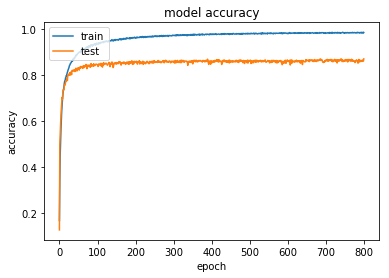

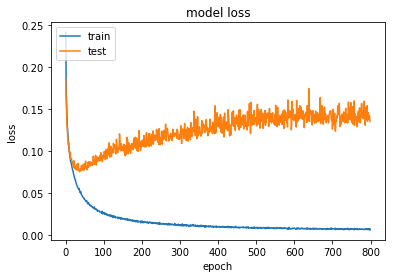

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['actual_accuracy'])
plt.plot(history.history['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model = load_model('test.h5')

In [6]:
h5f.close()

NameError: name 'h5f' is not defined

In [67]:
# evaluate the model
scores = model.evaluate([X_validate, X_other_features_validate], y_validate)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

108736/108961 [============================>.] - ETA: 0s
acc: 96.57%


In [187]:
pos = 0
print(decode_input(X_validate[pos], dictionary))
# predictions = model.predict([X_validate, X_other_features_validate])
predictions2 = model.predict([X_validate[pos:pos+1], X_other_features_validate[pos:pos+1]])
# print(predictions2)
print(np.round(predictions2)[0])
# predictions = np.round(predictions)
print(y_validate[pos])
# accuracy = sum([1 if np.all(y_validate[i] == predictions[i]) else 0 for i in range(X_validate.shape[0])])/float(X_validate.shape[0])
# print(accuracy)


import keras.backend as K

def act_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.mean(K.equal(K.round(y_true), K.round(y_pred)), axis=-1), 1.0))


def mean_pred2(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
#     return K.mean(K.all(K.equal(y_true, y_pred), axis=-1))
#     return K.equal(K.round(y_true), K.round(y_pred))

print(mean_pred(y_validate[pos], predictions[pos]).eval())
print(mean_pred(np.array([[ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 
                np.array([[ 0.,  0.51,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  0.92,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).eval())
# print(mean_pred(y_validate[pos], predictions[pos]))
# print(mean_pred2(y_validate[pos], predictions[pos]))
print(metrics.categorical_accuracy(y_validate[pos], predictions[pos]))

nerazloènejši
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
1.0
1.0
Elemwise{Cast{float32}}.0


In [ ]:
predictions = model.predict(X[429145:])

In [21]:
decode_position(predictions[0], max_num_vowels)

[1, 0]

In [23]:
def test_accuracy(predictions, y):
    dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
    num_of_pred = len(predictions)
    num_of_correct_pred = 0
    for i in range(predictions.shape[0]):
        if decode_position(predictions[i], max_num_vowels) == decode_position(y[i], max_num_vowels):
            num_of_correct_pred += 1

    return (num_of_correct_pred/float(num_of_pred)) * 100


print(test_accuracy(predictions, y[429145:]))

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
107287
96.5186835311


In [17]:
predictions.shape

(107287, 121)

In [12]:
print max_num_vowels

11


In [31]:
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
feature_dictionary = create_feature_dictionary(content)
def generate_input_from_word(word, max_word, dictionary):
    x = np.zeros((max_word, len(dictionary)))
    j = 0
    for c in list(word):
        index = 0
        for d in dictionary:
            if c == d:
                x[j, index] = 1
                break
            index += 1
        j += 1
    return x

# model = load_model()
# prediction = predict(model, generate_input_from_word('hidrija'))
# print decode_position(prediction[0])

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [190]:
%run ../../../prepare_data.py
# generate_X_and_y(dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels, feature_dictionary)